## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [1]:
%pylab inline
data_dir = "./Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [3]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  4909k      0  0:00:16  0:00:16 --:--:-- 4649k


### Get the statistics from the Pickle File

In [2]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [3]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [4]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [5]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.0

### Script for plotting yearly plots 

In [5]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

In [9]:
meas='TOBS'
STAT[meas]['low100'], STAT[meas]['high100']

(-167.0, 339.0)

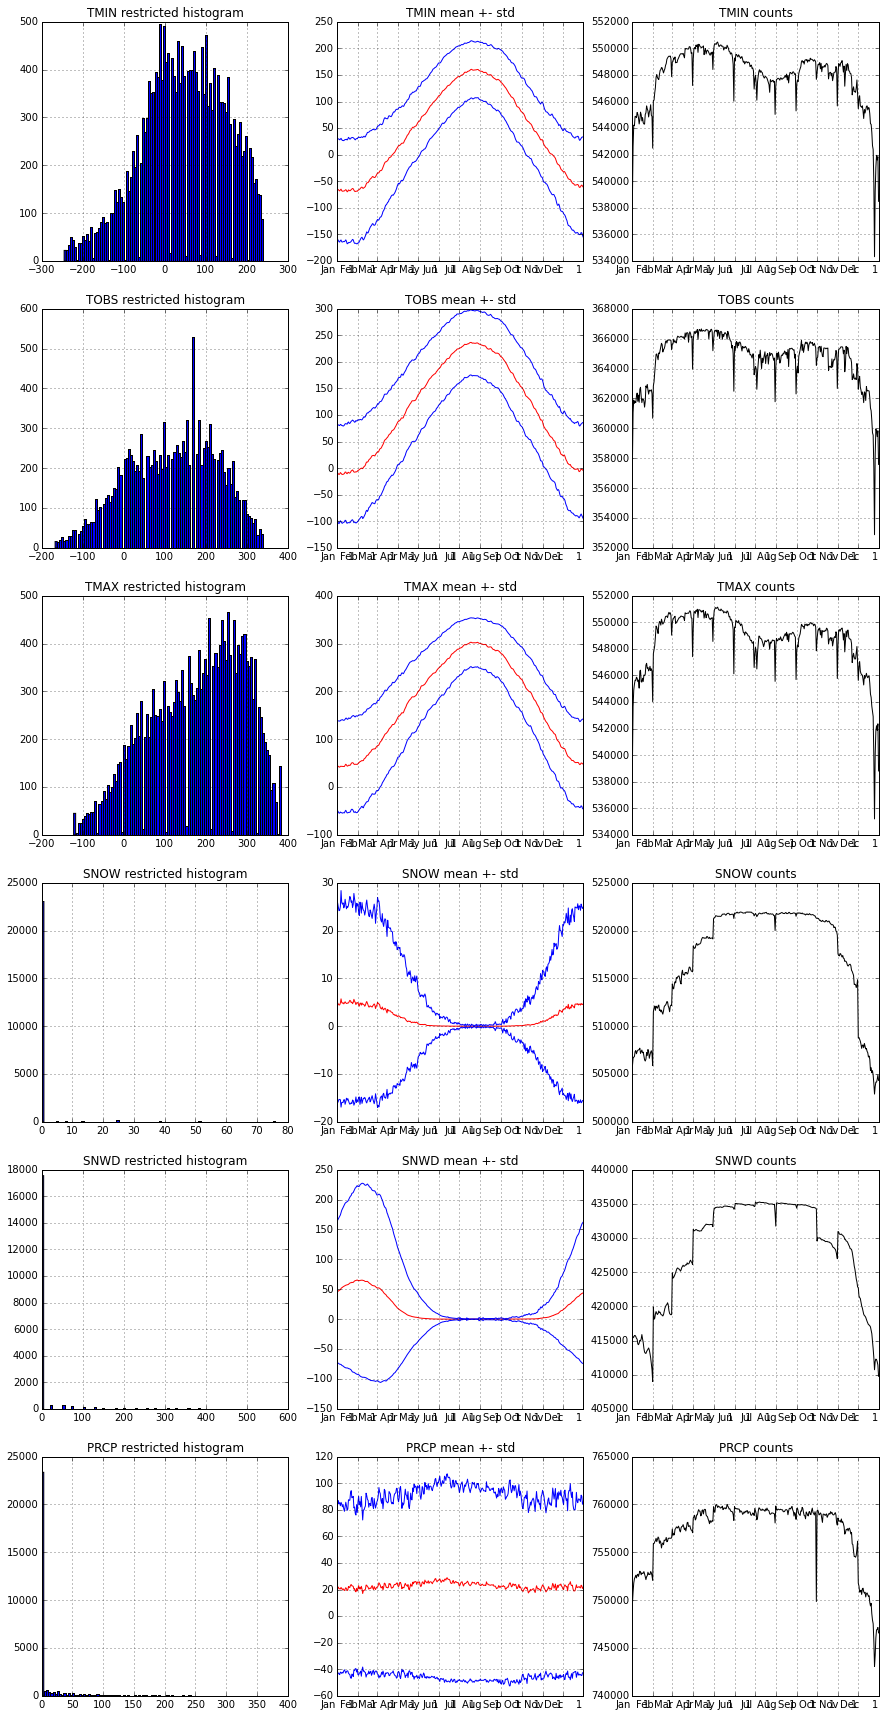

In [6]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    
    ## Your code for Histogram
    subplot(6,3,offset)
    X=STAT[meas]['SortedVals']
    X = filter(lambda x: x>=STAT[meas]['low100'], STAT[meas]['SortedVals'])
    X = filter(lambda x: x<=STAT[meas]['high100'], X)
    plt.hist(X,bins=100)
    grid()
    title(meas+' restricted histogram')
    offset+=1
    
    ## Your code for mean and mean +- std
    subplot(6,3,offset)
    YearlyPlots(STAT[meas]['Mean'],c='r')
    YearlyPlots(np.add(STAT[meas]['Mean'],np.sqrt(STAT[meas]['Var'])),c='b')
    YearlyPlots(np.subtract(STAT[meas]['Mean'],np.sqrt(STAT[meas]['Var'])),c='b')
    title(meas+' mean +- std')
    offset+=1
    
    ## Your code for number of measurements
    subplot(6,3,offset)
    YearlyPlots(STAT[meas]['NE'],c='k')
    title(meas+' counts')
    offset+=1


### Plot the Number of measurements recorded each day for TMAX

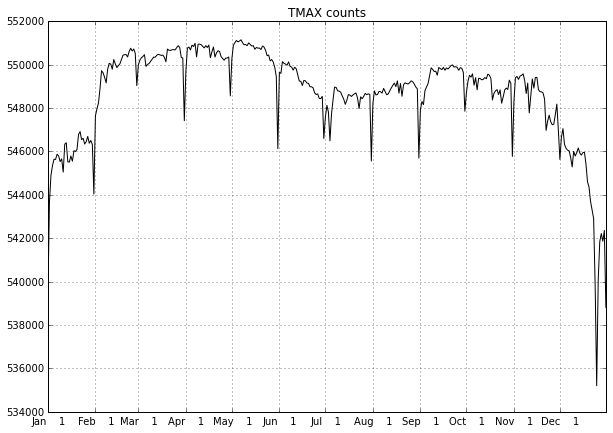

In [7]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'],c='k',ttl='TMAX counts')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


It seems that at month ends, there were some stations which did not take any readings. Because of this, there is a dip in the counts. One way to rectify this is to remove the month end dates from the readings (i.e. Jan 31, Feb 28 etc.) throughout the data. Similar effect is seen around the holiday season (christmas to new year) where the number of readings reduces drastically for all stations. This effect can also be removed by the previous suggested method.

SNWD counts show drastic changes(jumps) at month ends during the winter season. It seems that some stations are shut down or stop collecting snow depth data for months because they are buried in the snow and cannot collect it anyways. And it appears that these stations only start collecting data at the beginning of the months. i.e. They do not START collecting data as and when they can, but only at the beginnings of the months

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

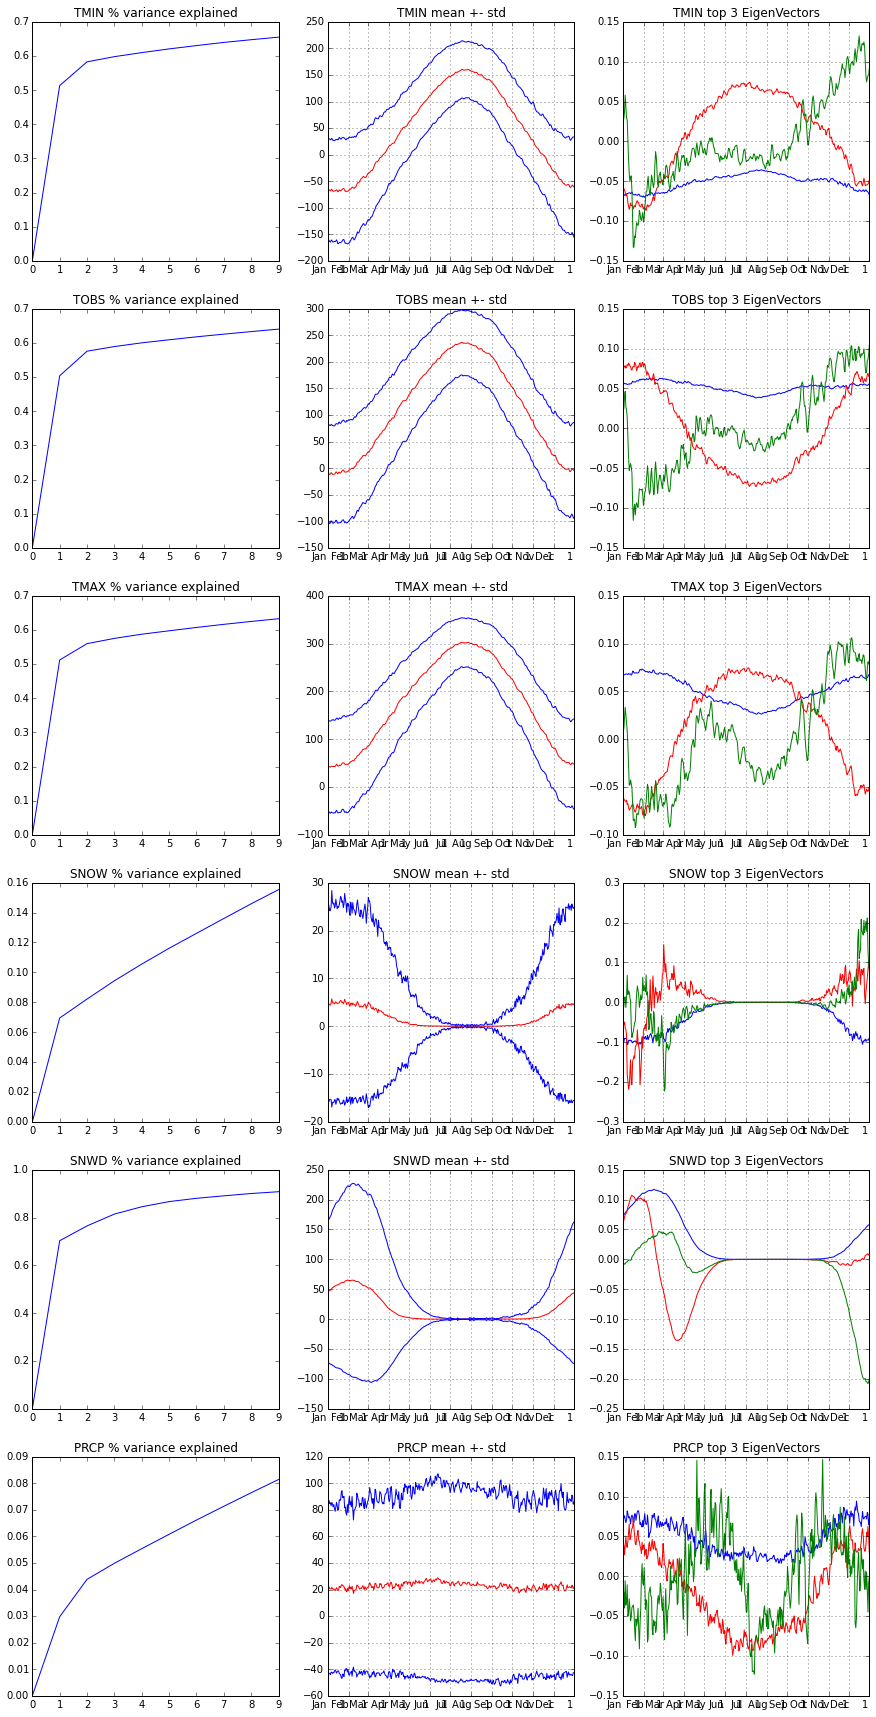

In [8]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    ## Your code for Histogram
    subplot(6,3,offset)
    total = sum(STAT[meas]['eigval'])
    X = [sum(STAT[meas]['eigval'][0:i])/float(total) for i in range(10)]
    plt.plot(X)
    title(meas+' % variance explained')
    offset+=1
    
    ## Your code for mean and mean +- std
    subplot(6,3,offset)
    YearlyPlots(STAT[meas]['Mean'],c='r')
    YearlyPlots(np.add(STAT[meas]['Mean'],np.sqrt(STAT[meas]['Var'])),c='b')
    YearlyPlots(np.subtract(STAT[meas]['Mean'],np.sqrt(STAT[meas]['Var'])),c='b')
    title(meas+' mean +- std')
    offset+=1
    
    ## Your code for number of measurements
    subplot(6,3,offset)
    YearlyPlots(STAT[meas]['eigvec'][:,0],c='b')
    YearlyPlots(STAT[meas]['eigvec'][:,1],c='r')
    YearlyPlots(STAT[meas]['eigvec'][:,2],c='g')
    title(meas+' top 3 EigenVectors')
    offset+=1